# t検定
２群間の平均値の差の検定

In [50]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
from scipy import stats

## サンプルデータの生成
numpy の randomモジュールを使って、２グループ分の「正規乱数」を生成します。


ｔ検定の仮定として、データは以下のようなものとします
* 母集団が正規分布に従っている（母集団の正規性の仮定）
* 二群の分散が等しい（分散の均一性の仮定）
* サンプルが独立に抽出されている（サンプルの独立性の仮定）

<AxesSubplot:>

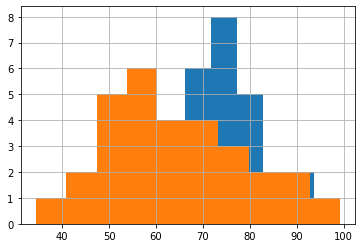

In [54]:
# Group A のデータ生成
a = np.random.normal(
    loc = 75, #平均
    scale = 10, #標準偏差
    size = 30, #データサイズ
    )
pd.Series(a).hist()

# Group B のデータ生成
b = np.random.normal(
    loc = 68, #平均
    scale = 12, #標準偏差
    size = 30, #データサイズ
    )
pd.Series(b).hist()

### 実質的な差の評価
ここで差がなければ、検定をする意味がないので・・

In [55]:
# 各グループの平均を確認
print(f'Group A の平均 = {a.mean():.2f}')
print(f'Group B の平均 = {b.mean():.2f}')
print(f'2群の平均の差 = {(abs(a.mean()-b.mean())):.2f}')

Group A の平均 = 73.48
Group B の平均 = 64.21
2群の平均の差 = 9.28


## 対応のある t 検定
Group A と Group B には対応があるという前提で検定します。  
つまり、同じメンバーに対して異なる条件で行なった実験結果と考えます。

In [56]:
# 対応のある検定は ttest_rel
t, p = stats.ttest_rel(a, b)

print('Studentのt検定｜対応あり')
print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')

Studentのt検定｜対応あり
p値 = 0.010
t値 = 2.77


実行例の場合、p<0.05 で「有意差あり」（帰無仮説は棄却）と判定されます。

## 対応のない t 検定

Group A と Group B には対応がないという前提で検定します。  *斜体テキスト*
つまり、異なるメンバーにそれぞれ異なる条件で行なった実験結果と考えます。

In [57]:
# 対応のない検定は ttest_ind
t, p = stats.ttest_ind(a, b, equal_var=True)

print('Studentのt検定｜対応なし')
print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')

Studentのt検定｜対応なし
p値 = 0.009
t値 = 2.69


実行例の場合、p<0.05 で「有意差あり」（帰無仮説は棄却）と判定されます。

## 対応のない t 検定（等分散性なし）
等分散性がないと仮定した場合には、Welchの t検定はを利用します。  
ttest_ind 関数の引数 equal_var を False とすることで Welch の方法が採用されます。

In [58]:
# 等分散性が仮定できない場合 ttest_ind で equal_var=False
t, p = stats.ttest_ind(a, b, equal_var=False)

print('Welchのt検定｜対応なし｜等分散性なし')
print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')

Welchのt検定｜対応なし｜等分散性なし
p値 = 0.010
t値 = 2.69


実行例の場合、p<0.05 で「有意差あり」（帰無仮説は棄却）と判定されます。